In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [3]:
dataset=pd.read_csv('../dataset_unified.csv', sep=';')
dataset.head()

,company,date,quarter,country,ROA,ROE,debt_to_equity,current_ratio,net_margin,revenue_growth,cash_ratio,inflation_YoY,gdp_growth_rate,interest_rate
0,Banco Santander,2024-09-30,2024-Q3,Spain,NaN,NaN,"16,15","0,33",NaN,"6,2414",NaN,"0,0217","0,0080","0,0365"
1,Banco Santander,2024-06-30,2024-Q2,Spain,"0,63","0,109","16,23","0,23","0,0906","-0,8712","0,23","0,0346","0,0080","0,0425"
2,Banco Santander,2024-03-31,2024-Q1,Spain,"0,6","0,1043","16,14","0,24","0,087","-0,6185","0,24","0,0314","0,0100","0,0450"
3,Banco Santander,2023-12-31,2023-Q4,Spain,"0,59","0,1035","16,24","0,35","0,0886","22,1927","0,34","0,0327","0,0070","0,0450"
4,Banco Santander,2023-09-30,2023-Q3,Spain,"0,55","0,0968","16,66","0,31","0,1044","0,0201","0,31","0,0282","0,0070","0,0450"


In [4]:
import pandas as pd
import numpy as np

# Load your dataset
dataset = pd.read_csv("../dataset_unified.csv", sep=';')

# List of numeric indicators (update as needed)
indicators_to_clean = [
    'ROA', 'ROE', 'net_margin', 'current_ratio',
    'cash_ratio', 'debt_to_equity', 'revenue_growth',
    'inflation_YoY', 'gdp_growth_rate', 'interest_rate'
]

# STEP 1: Clean all comma-based numbers → dots, then convert to numeric
for col in indicators_to_clean:
    dataset[col] = (
        dataset[col]
        .astype(str)
        .str.replace(',', '.', regex=False)     # Convert commas to dots
        .replace('nan', np.nan)                 # Replace string 'nan' with real NaN
    )
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')  # Convert to float

# ✅ Optional: check if conversion worked
print(dataset[indicators_to_clean].dtypes)


ROA                float64
ROE                float64
net_margin         float64
current_ratio      float64
cash_ratio         float64
debt_to_equity     float64
revenue_growth     float64
inflation_YoY      float64
gdp_growth_rate    float64
interest_rate      float64
dtype: object


In [5]:
dataset.head()

,company,date,quarter,country,ROA,ROE,debt_to_equity,current_ratio,net_margin,revenue_growth,cash_ratio,inflation_YoY,gdp_growth_rate,interest_rate
0,Banco Santander,2024-09-30,2024-Q3,Spain,NaN,NaN,16.15,0.33,NaN,6.2414,NaN,0.0217,0.008,0.0365
1,Banco Santander,2024-06-30,2024-Q2,Spain,0.63,0.1090,16.23,0.23,0.0906,-0.8712,0.23,0.0346,0.008,0.0425
2,Banco Santander,2024-03-31,2024-Q1,Spain,0.60,0.1043,16.14,0.24,0.0870,-0.6185,0.24,0.0314,0.010,0.0450
3,Banco Santander,2023-12-31,2023-Q4,Spain,0.59,0.1035,16.24,0.35,0.0886,22.1927,0.34,0.0327,0.007,0.0450
4,Banco Santander,2023-09-30,2023-Q3,Spain,0.55,0.0968,16.66,0.31,0.1044,0.0201,0.31,0.0282,0.007,0.0450


In [6]:
dataset['ROA']= dataset['ROA']/100

| **Indicator**              | **Low ( Risk Zone)** | **Normal ( Healthy)** | **High ( Possibly Excessive)** | **Interpretation**                                                   |
|---------------------------|------------------------|--------------------------|----------------------------------|------------------------------------------------------------------------|
| ROA (Return on Assets)    | < 1%                   | 1% – 5%                  | > 5%                             | Measures asset efficiency. Higher = better.                            |
| ROE (Return on Equity)    | < 10%                  | 10% – 20%                | > 20%                            | Equity profitability. Higher = stronger shareholder return.           |
| Net Profit Margin (%)     | < 5%                   | 5% – 15%                 | > 15%                            | Portion of revenue kept as profit. Higher = more efficient.           |
| Current Ratio             | < 1.0                  | 1.0 – 2.0                | > 3.0                            | Short-term solvency. <1 = possible liquidity issues.                  |
| Cash Ratio                | < 0.2                  | 0.2 – 0.5                | > 0.5                            | Strict cash-based liquidity. Higher = safer buffer.                   |
| Debt-to-Equity (Banks)    | > 30                   | 10 – 30                  | < 10                             | Leverage level. Higher = more financial risk (normal for banks).      |
| Revenue Growth (Quarterly)| < 0%                   | 0% – 10%                 | > 10%                            | Growth rate. <0 = revenue contraction; >10% = strong expansion.        |


In [12]:
dataset

,company,date,quarter,country,ROA,ROE,debt_to_equity,current_ratio,net_margin,revenue_growth,cash_ratio,inflation_YoY,gdp_growth_rate,interest_rate,current_ratio_clipped
0,Banco Santander,2024-09-30,2024-Q3,Spain,NaN,NaN,16.15,0.33,NaN,6.2414,NaN,0.0217,0.0080,0.0365,0.33
1,Banco Santander,2024-06-30,2024-Q2,Spain,0.0063,0.1090,16.23,0.23,0.0906,-0.8712,0.23,0.0346,0.0080,0.0425,0.23
2,Banco Santander,2024-03-31,2024-Q1,Spain,0.0060,0.1043,16.14,0.24,0.0870,-0.6185,0.24,0.0314,0.0100,0.0450,0.24
3,Banco Santander,2023-12-31,2023-Q4,Spain,0.0059,0.1035,16.24,0.35,0.0886,22.1927,0.34,0.0327,0.0070,0.0450,0.35
4,Banco Santander,2023-09-30,2023-Q3,Spain,0.0055,0.0968,16.66,0.31,0.1044,0.0201,0.31,0.0282,0.0070,0.0450,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,JP Morgan Chase,2013-03-31,2013-Q1,USA,0.0092,0.1068,10.54,0.95,0.2012,0.0009,0.52,0.0168,0.0139,0.0014,0.95
210,JP Morgan Chase,2012-12-31,2012-Q4,USA,0.0086,0.1013,10.56,0.93,0.1839,0.0575,0.51,0.0189,0.0062,0.0016,0.93
211,JP Morgan Chase,2012-09-30,2012-Q3,USA,0.0078,0.0942,10.62,0.92,0.1690,-0.0627,0.49,0.0170,0.0069,0.0014,0.92
212,JP Morgan Chase,2012-06-30,2012-Q2,USA,0.0072,0.0888,10.95,0.91,0.1568,0.1061,0.48,0.0189,0.0086,0.0015,0.91


In [13]:
# Application des seuils personnalisés
dataset['flag_low_ROA'] = dataset['ROA'] < 0.005  # 0.5%
dataset['flag_high_ROA'] = dataset['ROA'] > 0.015  # 1.5%

dataset['flag_low_ROE'] = dataset['ROE'] < 0.06
dataset['flag_high_ROE'] = dataset['ROE'] > 0.10

dataset['flag_low_net_margin'] = dataset['net_margin'] < 0.14
dataset['flag_high_net_margin'] = dataset['net_margin'] > 0.23

dataset['flag_low_current_ratio'] = dataset['current_ratio'] < 0.80
dataset['flag_high_current_ratio'] = dataset['current_ratio'] > 1.5

dataset['flag_low_cash_ratio'] = dataset['cash_ratio'] < 0.20
dataset['flag_high_cash_ratio'] = dataset['cash_ratio'] > 0.60

# ✅ Seuil spécifique pour debt-to-equity
dataset['flag_high_debt_to_equity'] = dataset['debt_to_equity'] > 30
dataset['flag_low_debt_to_equity'] = dataset['debt_to_equity'] < 10

# Nombre total de signaux de faiblesse détectés
dataset['total_flags_low'] = dataset[[
    'flag_low_ROA', 'flag_low_ROE', 'flag_low_net_margin',
    'flag_low_current_ratio', 'flag_low_cash_ratio',
    'flag_low_debt_to_equity'
]].sum(axis=1)
dataset['total_flags_low']
# Colonne descriptive pour les signaux faibles
dataset['flag_summary_low'] = dataset['total_flags_low'].apply(
    lambda x: f"⚠️ {x} flag{'s' if x > 1 else ''} low" if x > 0 else "✅ no issue"
)

# Colonne descriptive pour les signaux forts (positifs)
flag_high_cols = [
    'flag_high_ROA', 'flag_high_ROE', 'flag_high_net_margin',
    'flag_high_current_ratio', 'flag_high_cash_ratio'
]

dataset['total_flags_high'] = dataset[flag_high_cols].sum(axis=1)

dataset['flag_summary_high'] = dataset['total_flags_high'].apply(
    lambda x: f"👍 {x} flag{'s' if x > 1 else ''} high" if x > 0 else "–"
)

# Map each flag to a readable name
low_flag_labels = {
    'flag_low_ROA': 'ROA',
    'flag_low_ROE': 'ROE',
    'flag_low_net_margin': 'Net Margin',
    'flag_low_current_ratio': 'Current Ratio',
    'flag_low_cash_ratio': 'Cash Ratio',
    'flag_low_debt_to_equity': 'Debt/Equity'
}

# Function to summarize which low flags are active
def get_low_flag_labels(row):
    active_flags = [label for flag, label in low_flag_labels.items() if row.get(flag, False)]
    return "⚠️ " + ", ".join(active_flags) if active_flags else "✅ no issue"

# Apply to your dataset
dataset['flag_details_low'] = dataset.apply(get_low_flag_labels, axis=1)



In [14]:
dataset[['company', 'quarter', 'total_flags_low', 'flag_summary_low', 'flag_summary_high']].tail(1000)


,company,quarter,total_flags_low,flag_summary_low,flag_summary_high
0,Banco Santander,2024-Q3,1,⚠️ 1 flag low,–
1,Banco Santander,2024-Q2,2,⚠️ 2 flags low,👍 1 flag high
2,Banco Santander,2024-Q1,2,⚠️ 2 flags low,👍 1 flag high
3,Banco Santander,2023-Q4,2,⚠️ 2 flags low,👍 1 flag high
4,Banco Santander,2023-Q3,2,⚠️ 2 flags low,–
...,...,...,...,...,...
209,JP Morgan Chase,2013-Q1,0,✅ no issue,👍 1 flag high
210,JP Morgan Chase,2012-Q4,0,✅ no issue,👍 1 flag high
211,JP Morgan Chase,2012-Q3,0,✅ no issue,–
212,JP Morgan Chase,2012-Q2,0,✅ no issue,–


C:\Users\lecoz\AppData\Local\Temp\ipykernel_10676\2903489588.py:37: UserWarning: Glyph 129517 (\N{COMPASS}) missing from current font.
  plt.tight_layout()
c:\Users\lecoz\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129517 (\N{COMPASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


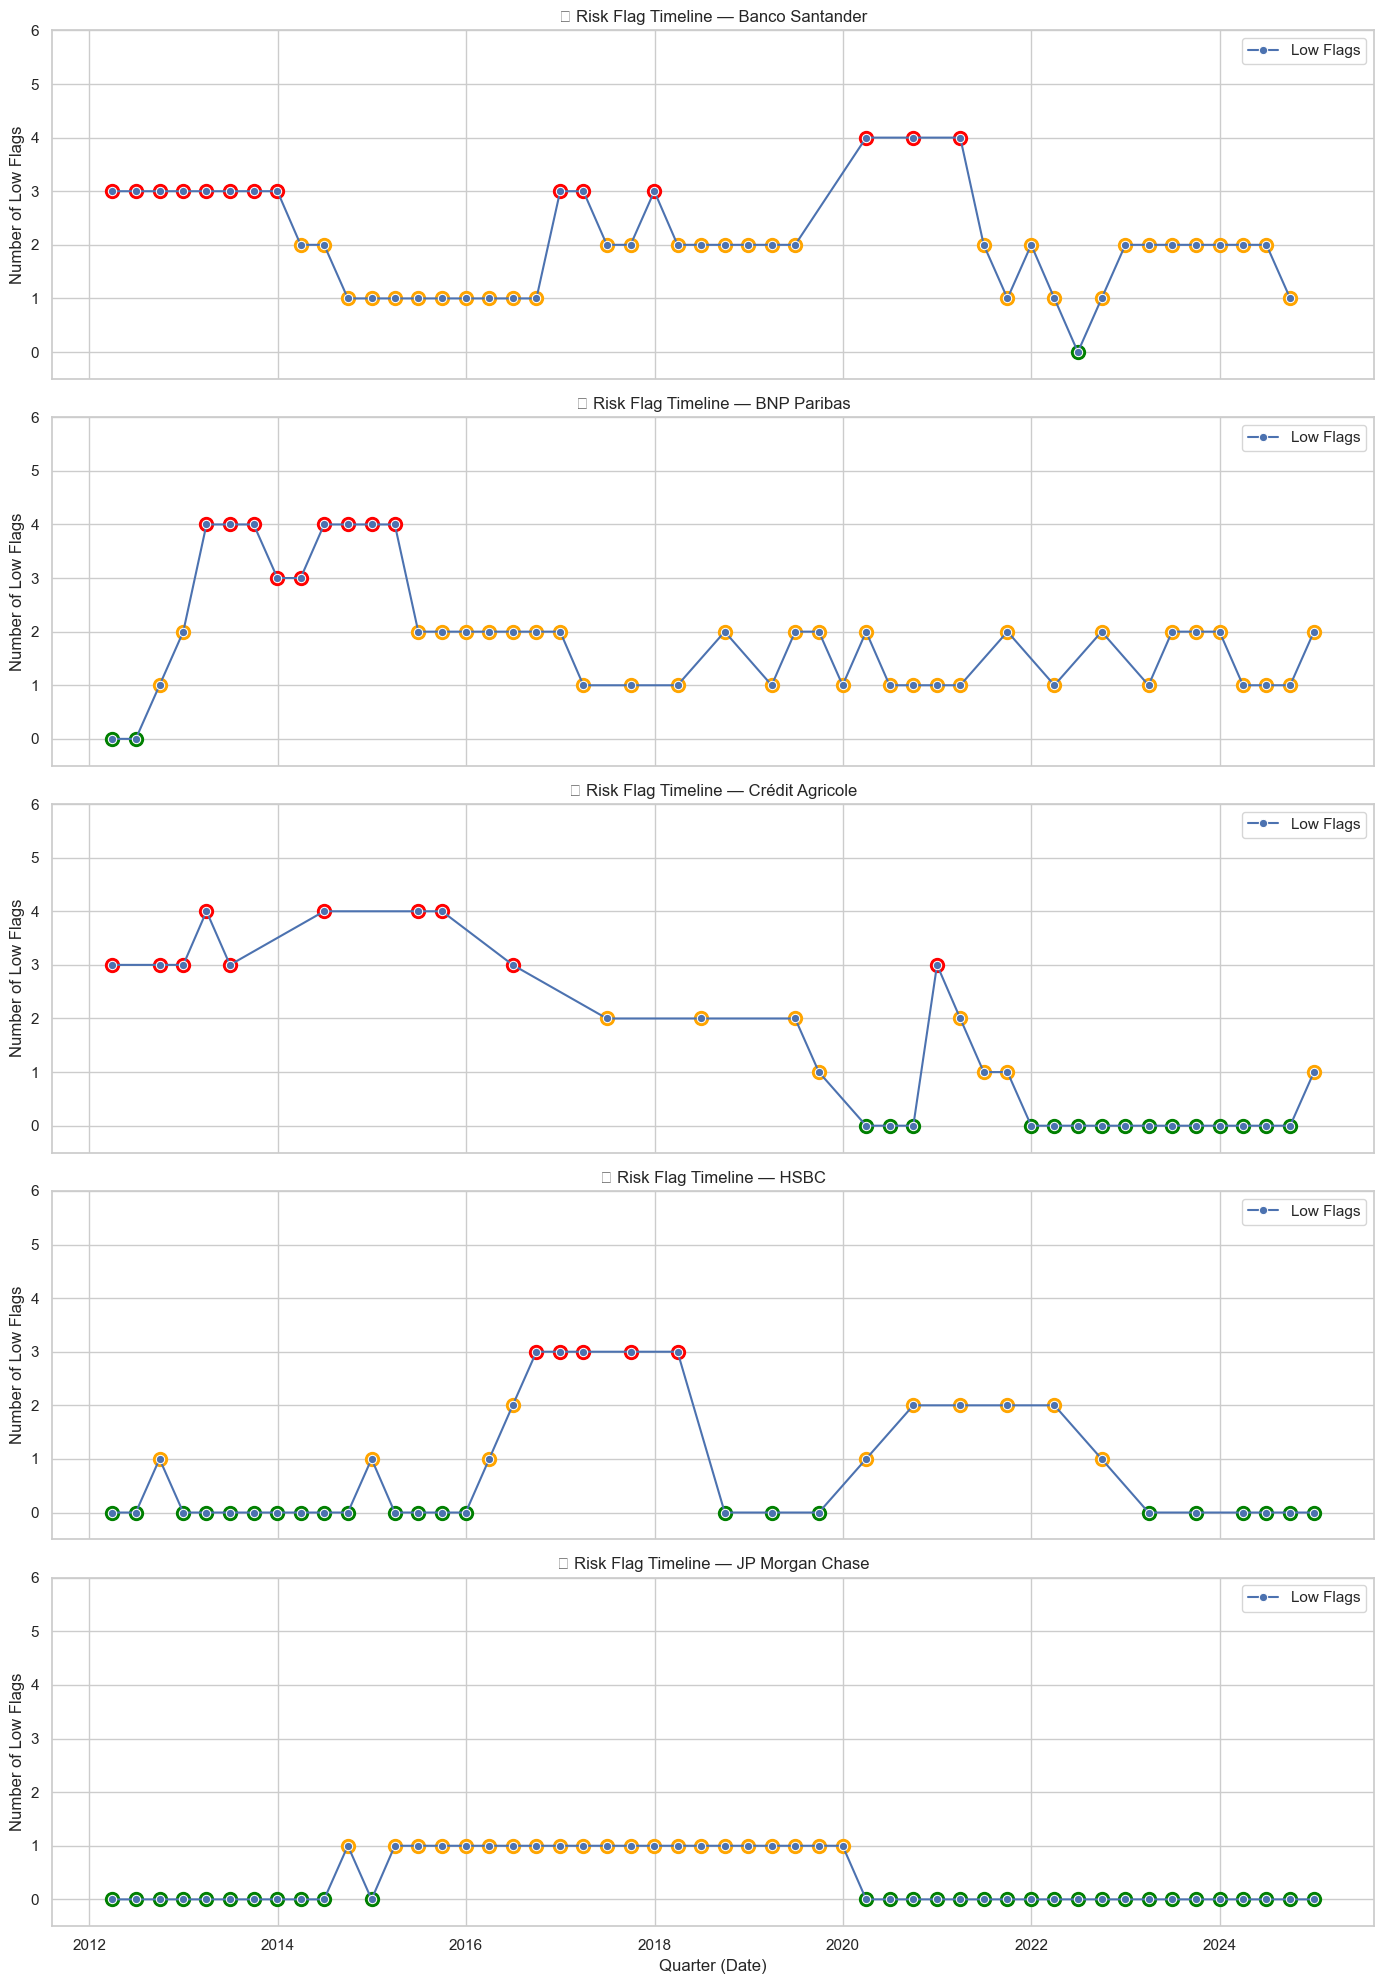

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime format
dataset['date'] = pd.to_datetime(dataset['date'], errors='coerce')

# Build plotting dataset: one row per company & date with number of risk flags
plot_df = dataset[['company', 'date', 'total_flags_low']].dropna()

# Plot setup
sns.set(style="whitegrid")
companies = plot_df['company'].unique()
n_rows = len(companies)

fig, axes = plt.subplots(n_rows, 1, figsize=(14, 4 * n_rows), sharex=True)

if n_rows == 1:
    axes = [axes]

# Plot per company
for i, company in enumerate(companies):
    ax = axes[i]
    df_sub = plot_df[plot_df['company'] == company].sort_values('date')

    # Plot line + point with color-coded flags
    sns.lineplot(data=df_sub, x='date', y='total_flags_low', marker='o', ax=ax, label='Low Flags')
    for idx, row in df_sub.iterrows():
        color = "red" if row['total_flags_low'] >= 3 else "orange" if row['total_flags_low'] >= 1 else "green"
        ax.scatter(row['date'], row['total_flags_low'], color=color, s=100)

    ax.set_title(f"🧭 Risk Flag Timeline — {company}")
    ax.set_ylabel("Number of Low Flags")
    ax.set_ylim(-0.5, 6)
    ax.grid(True)

plt.xlabel("Quarter (Date)")
plt.tight_layout()
plt.show()


In [17]:
pip install dash pandas plotly



  Obtaining dependency information for dash from https://files.pythonhosted.org/packages/0d/20/2e7ab37ea2ef1f8b2592a2615c8b3fb041ad51f32101061d8bc6465b8b40/dash-3.0.4-py3-none-any.whl.metadata
  Obtaining dependency information for retrying from https://files.pythonhosted.org/packages/8f/04/9e36f28be4c0532c0e9207ff9dc01fb13a2b0eb036476a213b0000837d0e/retrying-1.3.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
    --------------------------------------- 0.1/7.9 MB 4.3 MB/s eta 0:00:02
   - -------------------------------------- 0.3/7.9 MB 2.9 MB/s eta 0:00:03
   - -------------------------------------- 0.3/7.9 MB 2.9 MB/s eta 0:00:03
   - -------------------------------------- 0.3/7.9 MB 1.6 MB/s eta 0:00:05
   -- ------------------------------------- 0.4/7.9 MB 1.9 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/7.9 MB 2.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/7.9 MB 1.7 MB/s eta 0:00:05
   -